In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
data=pd.read_csv('dtvir.data',sep='\s+',names=['JD','Rel_mag'])

In [3]:
data

,JD,Rel_mag
0,5.682,0.493
1,29.630,0.528
2,31.664,0.496
3,33.651,0.527
4,36.671,0.533
5,51.596,0.481
6,52.583,0.550
7,56.511,0.503
8,69.518,0.522
9,77.499,0.506


In [4]:
data['f']=data.Rel_mag-np.mean(data.Rel_mag)

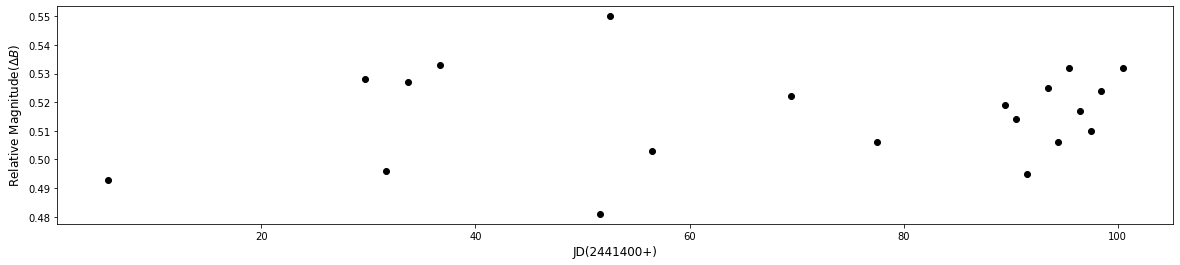

In [5]:
plt.figure(figsize=[20,4])
plt.plot(data.JD, data.Rel_mag,'ko')
plt.xlabel('JD(2441400+)',fontsize=12)
plt.ylabel('Relative Magnitude($\Delta B$)',fontsize=12)
plt.savefig('Photometric.jpeg')

# Date Compensated Discrete Fourier Transform (DCDFT)

In [6]:
N_freq=1/1.99454   #Nyquist period 

In [7]:
w=np.linspace(0,N_freq,1000)  #trail Period


In [8]:
#Function to calculate necessary summations of sins and cosines
def simp_sum(x,f):       
    cosx=0
    sinx=0
    sinxcosx=0
    cos2x=0
    sin2x=0
    fsinx=0
    fcosx=0
    f2=0
    for i in range(len(x)):
        cosx+=np.cos(x[i])
        sinx+=np.sin(x[i])
        sinxcosx=sinxcosx+(np.sin(x[i])*np.cos(x[i]))
        sin2x=sin2x+np.sin(x[i])**2
        cos2x=cos2x+np.cos(x[i])**2
        fcosx=fcosx+f[i]*np.cos(x[i])
        fsinx=fsinx+f[i]*np.sin(x[i])
        f2=f2+f[i]**2    
    #print(cosx,sinx,sinxcosx,sin2x,cos2x,fsinx,fcosx,f2)
    return cosx,sinx,sinxcosx,sin2x,cos2x,fsinx,fcosx,f2

In [9]:
#Funtion to calculate S(w)
def cal_S(x,f):             
    Scosx,Ssinx,Ssinxcosx,Ssin2x,Scos2x,Sfsinx,Sfcosx,Sf2=simp_sum(x,f)
    N=len(f)
    a0=1/np.sqrt(N)
    M=Ssinxcosx-(a0**2)*Ssinx*Scosx
    
    a1=1/np.sqrt(Scos2x-(a0**2)*Scosx**2)
    a2=1/np.sqrt(Ssin2x-((a0**2)*Ssinx**2)-(a1*M)**2)
    c1=a1*Sfcosx
    c2=a2*Sfsinx-a1*a2*c1*M
    S=(c1**2+c2**2)/Sf2
    return S

In [10]:
S=[]
for i in range(len(w)):
    x=np.array(2*np.pi*data.JD.array*w[i])
    scal=cal_S(x,data.f.array)
    S.append(scal)

/tmp/ipykernel_40356/655393995.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  a1=1/np.sqrt(Scos2x-(a0**2)*Scosx**2)
/tmp/ipykernel_40356/655393995.py:9: RuntimeWarning: invalid value encountered in double_scalars
  a2=1/np.sqrt(Ssin2x-((a0**2)*Ssinx**2)-(a1*M)**2)


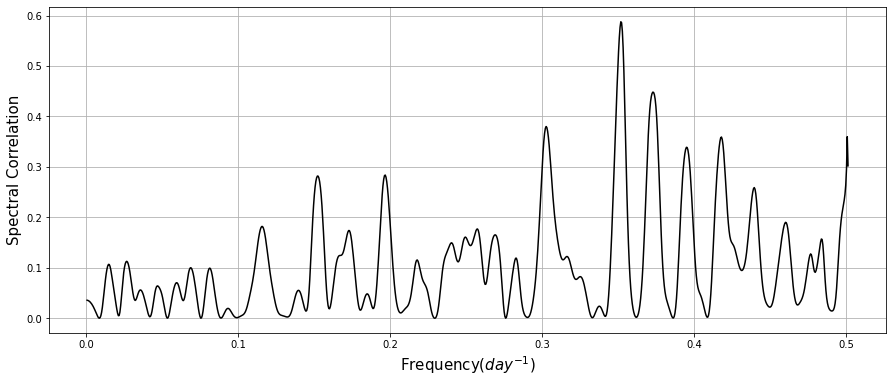

In [11]:
plt.figure(figsize=[15,6])
plt.plot(w[0:1000],S,'k-')
plt.grid()
plt.xlabel('Frequency($day^{-1}$)',fontsize=15)
plt.ylabel('Spectral Correlation',fontsize=15)
#plt.xlim(0,0.5)
#plt.ylim(0,0.85)
plt.savefig('Spectral Correlation vs Freq.jpeg')
plt.show()

# STATISTICAL TEST FOR TIME-SERIES

In [12]:
N=len(data.JD)
deltaw=max(w)-min(w)
deltat=max(data.JD.array)-min(data.JD.array)
alpha=(2*(N-3)*deltat*deltaw)/(3*(N-4))
G=[]
H=[]
C=[]

for i in range(len(S)):
    G.append((-(N-3)/2)*np.log(1-S[i]))
    H.append(((N-4)/(N-3))*(G[i]+np.exp(-G[i])+1))
   
    C.append((1-np.exp(-H[i]))**alpha)

<Figure size 1080x432 with 0 Axes>

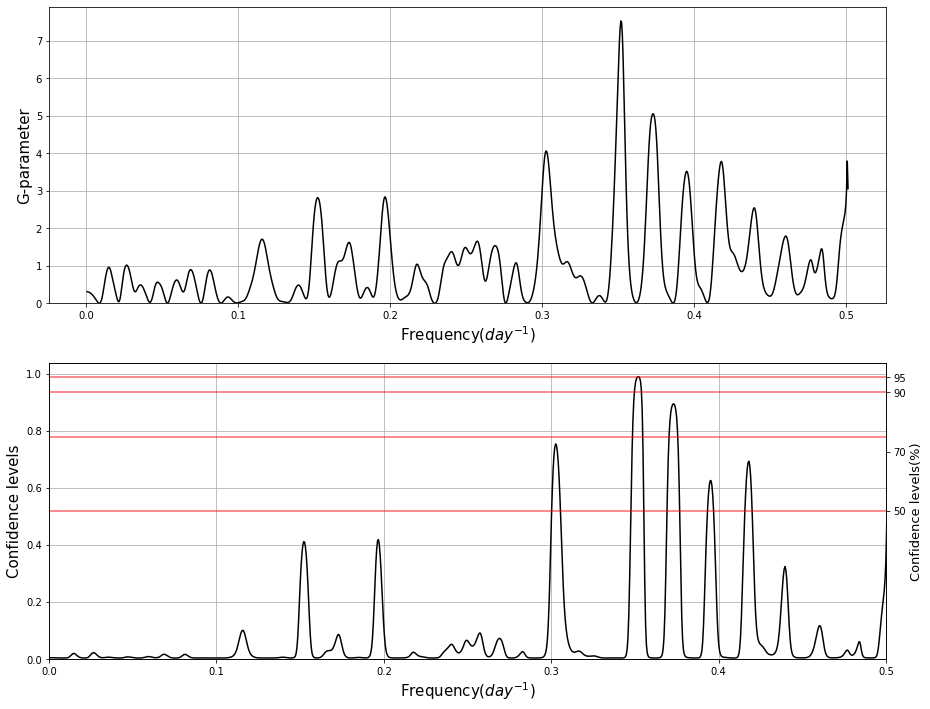

In [13]:
plt.figure(figsize=[15,6])
fig,ax=plt.subplots(2,1,figsize=[15,12])


ax[0].plot(w[0:1000],G,'k-')
ax[0].grid()
ax[0].set_xlabel('Frequency($day^{-1}$)',fontsize=15)
ax[0].set_ylabel('G-parameter',fontsize=15)
#ax[0].set_xlim(0,0.5)
ax[0].set_ylim(0)

ax[1].plot(w[0:1000],C,'k-')
#ax[1].plot(w[0:1000],C,'r-')
ax[1].grid()
ax[1].set_xlabel('Frequency($day^{-1}$)',fontsize=15)
ax[1].set_ylabel('Confidence levels',fontsize=15)
ax[1].set_xlim(0,0.5)
ax_twin = ax[1].twinx()
ax_twin.set_ylabel('Confidence levels(%)',fontsize=13)
ax_twin.set_ylim(0,100)
ax_twin.axhline(y=95,color='red',alpha=0.6)
ax_twin.axhline(y=90,color='red',alpha=0.6)
ax_twin.axhline(y=75,color='red',alpha=0.6)
ax_twin.axhline(y=50,color='red',alpha=0.6)
ax_twin.set_yticks([95,90,70,50])
ax[1].set_ylim(0)

#ax[2].plot(w[0:1000],C,'r-')
#ax[1].plot(w[0:1000],C,'r-')
#ax[2].grid()
#ax[2].set_xlabel('Frequency($day^{-1}$)',fontsize=15)
#ax[2].set_ylabel('Confidance levels',fontsize=15)#
#ax[2].set_xlim(0,0.5)
#ax[2].axhline(0.95)
#ax[1].set_ylim(0)

plt.savefig('GandC.jpeg')
plt.show()

In [14]:
max_w=w[np.argmax(S[1:])] #best frequency
Period=1/max_w #Period

In [15]:
print('Best Frequency:',max_w,'D^{-1}')
print('Period:',Period,'D')

Best Frequency: 0.351309425080821 D^{-1}
Period: 2.846493514285714 D


In [16]:
data['Phase']=((data.JD-data.JD[0])/Period)-np.fix((data.JD-data.JD[0])/Period)

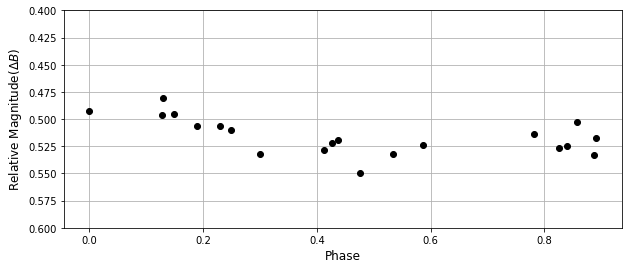

In [17]:
plt.figure(figsize=[10,4])
plt.plot(data.Phase, data.Rel_mag,'ko')
plt.xlabel('Phase',fontsize=12)
plt.ylabel('Relative Magnitude($\Delta B$)',fontsize=12)
plt.grid()
plt.ylim(0.6,0.4)
plt.savefig('Relmag vs phase.jpeg')
